### belkacem dounia 





## **TP 01 "Amélioration d’Image par RECADRAGE"**



---


## **1. Objectif**

L'objectif de ce TP est d'appliquer une méthode simple d’amélioration d’image. Elle consiste à convertir une image en niveaux de gris, puis à appliquer un étirement de contraste pour améliorer sa visibilité, notamment lorsqu’elle présente peu de variations d’intensité.

---

## **2. Méthodologie**

### **2.1. Étapes principales**

1. **Chargement et conversion en niveaux de gris** :  
   L’image est chargée à l’aide de la bibliothèque `PIL`, puis convertie en niveaux de gris à l’aide de la méthode `convert("L")`. Cela permet de réduire l’image à une seule couche d’intensité et de faciliter le traitement.

2. **Calcul des valeurs extrêmes d’intensité** :  
   L’image en niveaux de gris est convertie en matrice NumPy afin d’en extraire les valeurs minimale et maximale d’intensité, représentant respectivement les zones les plus sombres et les plus claires de l’image.

3. **Étirement de contraste** :  
   Chaque intensité \( I \) est transformée linéairement selon la formule suivante :

   $$
   I_{\text{étiré}} = \frac{255}{I_{\text{max}} - I_{\text{min}}} \cdot (I - I_{\text{min}})
   $$

   Cette opération permet d’étendre les valeurs de l’image sur toute la plage dynamique \([0, 255]\), améliorant ainsi significativement le contraste.



---

## **3. Résultats**

### **3.1. Image originale**

- **Valeurs minimales et maximales des niveaux de gris** :  
  - Min : `{min_val}`  
  - Max : `{max_val}`

- **Visualisation de l’image originale** :  
  L’image originale présente un faible contraste, avec des niveaux de gris concentrés dans une plage étroite.

### **3.2. Image après étirement de contraste**

- **Visualisation de l’image améliorée** :  
  L’image améliorée montre un contraste significativement meilleur, avec des détails plus visibles.

---

## **4. Conclusion**

L’étirement de contraste est une méthode simple mais efficace pour améliorer la visibilité des images présentant un faible contraste. Cependant, cette méthode peut être limitée dans les cas où l’image contient des artefacts ou des zones saturées. 



Min: 95 Max: 227


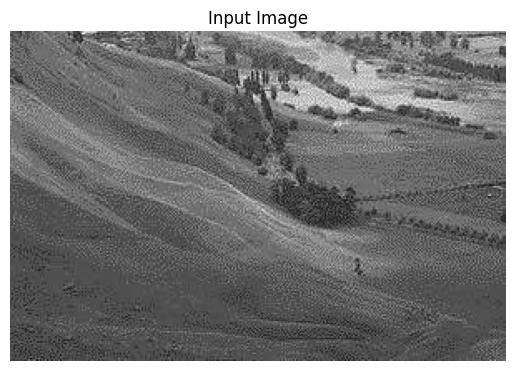

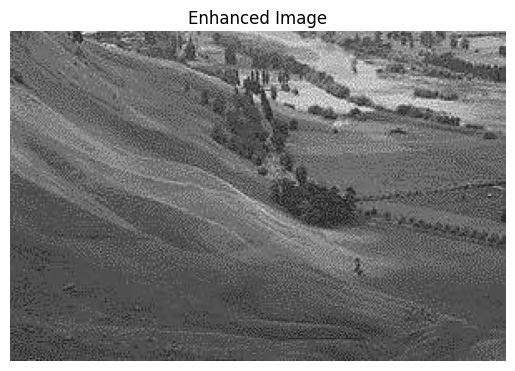

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def image_to_grayscale(image_path):
    image = Image.open(image_path)
    gray_image = image.convert("L")
    return gray_image

def calculate_min_max(gray_image):
    gray_matrix = np.array(gray_image)
    min_val = np.min(gray_matrix)
    max_val = np.max(gray_matrix)
    return min_val, max_val

def enhance_image(gray_image, min_val, max_val):
    width, height = gray_image.size
    enhanced_image = Image.new('L', (width, height))
    
    for x in range(width):
        for y in range(height):
            gray = gray_image.getpixel((x, y))
            enhanced_gray = int(255 / (max_val - min_val) * (gray - min_val))
            enhanced_image.putpixel((x, y), enhanced_gray)
    
    return enhanced_image

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_image(image, output_path):
    image.save(output_path)

image_path = r'C:\Users\DELL\Desktop\tp_tim\pics\blurred2.jpg'
output_path = 'output_image.jpg'

gray_image = image_to_grayscale(image_path)
min_val, max_val = calculate_min_max(gray_image)
enhanced_image = enhance_image(gray_image, min_val, max_val)

print("Min:", min_val, "Max:", max_val)
display_image(gray_image, "Input Image")
display_image(enhanced_image, "Enhanced Image")
save_image(enhanced_image, output_path)